<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Standarize-variables" data-toc-modified-id="1.-Standarize-variables-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1. Standarize variables</a></span></li><li><span><a href="#2.-Clustering-with-K-mean" data-toc-modified-id="2.-Clustering-with-K-mean-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2. Clustering with K-mean</a></span><ul class="toc-item"><li><span><a href="#2.1-.-Choosing-K" data-toc-modified-id="2.1-.-Choosing-K-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>2.1 . Choosing K</a></span><ul class="toc-item"><li><span><a href="#2.2.1.-Elbows" data-toc-modified-id="2.2.1.-Elbows-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>2.2.1. Elbows</a></span></li><li><span><a href="#2.2.1.-Silouhete" data-toc-modified-id="2.2.1.-Silouhete-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>2.2.1. Silouhete</a></span></li></ul></li></ul></li><li><span><a href="#3.-I-choose-for-10-cluster-in-k-mean-model" data-toc-modified-id="3.-I-choose-for-10-cluster-in-k-mean-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3. I choose for 10 cluster in k-mean model</a></span></li><li><span><a href="#4.-Export-model" data-toc-modified-id="4.-Export-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>4. Export model</a></span></li></ul></div>

# Scaling and training the model K-means

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score #evaluate clustering
import pickle #save my models trained
import pandas as pd
import numpy as np

In [2]:
audio_features_for_cluster = pd.read_csv("../data/audio_features_for_cluster.csv",index_col=False)

In [4]:
audio_features_for_cluster = audio_features_for_cluster.iloc[:,1:] # I delete the first extra index column

In [5]:
audio_features_for_cluster

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.759,0.459,8.0,-5.187,1.0,0.0948,0.003230,0.000000,0.0906,0.695,109.997
1,0.556,0.661,6.0,-5.052,0.0,0.2040,0.300000,0.000000,0.1010,0.668,168.560
2,0.702,0.825,6.0,-3.787,0.0,0.0601,0.008830,0.000000,0.0674,0.915,102.977
3,0.677,0.696,0.0,-6.181,1.0,0.1190,0.321000,0.000000,0.4200,0.464,90.030
4,0.586,0.616,5.0,-7.964,1.0,0.0324,0.182000,0.000000,0.0927,0.719,148.088
...,...,...,...,...,...,...,...,...,...,...,...
10112,0.346,0.944,9.0,-9.874,1.0,0.0485,0.000042,0.565000,0.0546,0.403,179.630
10113,0.609,0.679,0.0,-4.545,1.0,0.0312,0.243000,0.000000,0.1990,0.487,122.034
10114,0.897,0.371,1.0,-5.019,1.0,0.3680,0.090400,0.000000,0.3250,0.441,81.008
10115,0.964,0.398,11.0,-8.981,0.0,0.0795,0.001510,0.000039,0.1010,0.563,105.012


## 1. Standarize variables

In [6]:
scaler= StandardScaler() #I store it in this variable
scaler.fit(audio_features_for_cluster) #we are telling thim where to find the mean and standard deviation
audio_features_for_cluster_scaled = scaler.transform(audio_features_for_cluster)

In [7]:
audio_features_for_cluster_scaled

array([[ 0.83966162, -0.92006451,  0.77262036, ..., -0.63214236,
         0.65133002, -0.41300353],
       [-0.44388727,  0.01310138,  0.2157238 , ..., -0.56273781,
         0.54134722,  1.7416953 ],
       [ 0.47925627,  0.77072121,  0.2157238 , ..., -0.78696791,
         1.5474861 , -0.67128924],
       ...,
       [ 1.71222196, -1.32659222, -1.17651762, ...,  0.93212956,
        -0.38332292, -1.47959104],
       [ 2.13585632, -1.20186213,  1.60796521, ..., -0.56273781,
         0.11363636, -0.59641582],
       [ 0.16943412, -0.61978836,  1.60796521, ...,  0.11796073,
         0.072902  , -1.37061066]])

In [8]:
#Now I create a data fram with the arrays

scaled_df = pd.DataFrame(audio_features_for_cluster_scaled, columns=audio_features_for_cluster.columns)

In [9]:
scaled_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1.011700e+04,1.011700e+04,1.011700e+04,1.011700e+04,1.011700e+04,1.011700e+04,1.011700e+04,1.011700e+04,1.011700e+04,1.011700e+04,1.011700e+04
mean,-1.123721e-16,9.270697e-17,5.829302e-17,1.685581e-16,1.123721e-16,1.011349e-16,-7.304185e-17,-2.809302e-17,2.500279e-16,-1.460837e-16,3.546744e-17
std,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00
min,-3.959420e+00,-3.037210e+00,-1.454966e+00,-8.325897e+00,-1.239702e+00,-9.851225e-01,-8.448364e-01,-3.097963e-01,-1.136660e+00,-2.179709e+00,-4.460105e+00
25%,-5.766682e-01,-5.643528e-01,-8.980693e-01,-3.110225e-01,-1.239702e+00,-5.690333e-01,-7.567903e-01,-3.097963e-01,-6.174606e-01,-7.784463e-01,-7.803064e-01
50%,9.355931e-02,1.886474e-01,-6.272449e-02,2.659711e-01,8.066456e-01,-4.134321e-01,-4.436378e-01,-3.097685e-01,-3.958999e-01,1.587388e-02,2.667085e-02
75%,6.942349e-01,7.614819e-01,7.726204e-01,6.089925e-01,8.066456e-01,7.411843e-02,4.297808e-01,-3.045688e-01,3.515338e-01,8.183409e-01,5.612708e-01
max,2.230700e+00,1.579157e+00,1.607965e+00,1.986139e+00,8.066456e-01,9.895437e+00,2.691438e+00,4.748543e+00,5.356670e+00,1.893728e+00,3.379970e+00


## 2. Clustering with K-mean

### 2.1 . Choosing K

#### 2.2.1. Elbows

In [10]:
K = range(2, 20)

inertia = [] #sotre the inertia values

for k in K:
    kmeans = KMeans(n_clusters=k,random_state=1234)
    kmeans.fit(scaled_df) # i train it with that, is alraady scaled
    inertia.append(kmeans.inertia_)
      

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

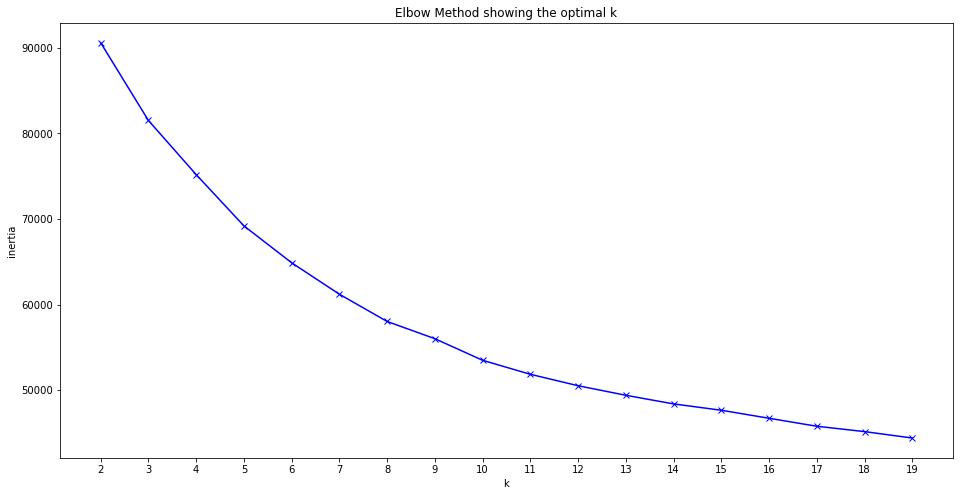

In [12]:
plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

###Maybe at 15 we can see a little elbow

In [ ]:
#Not clear elbows...

#### 2.2.1. Silouhete

In [14]:
 #same settings as before
K2 = range(2, 20)

silhouette2 = []

for k in K2:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(scaled_df) #i can use the data framo r the array
    silhouette2.append(silhouette_score(scaled_df, kmeans.predict(scaled_df)))


Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

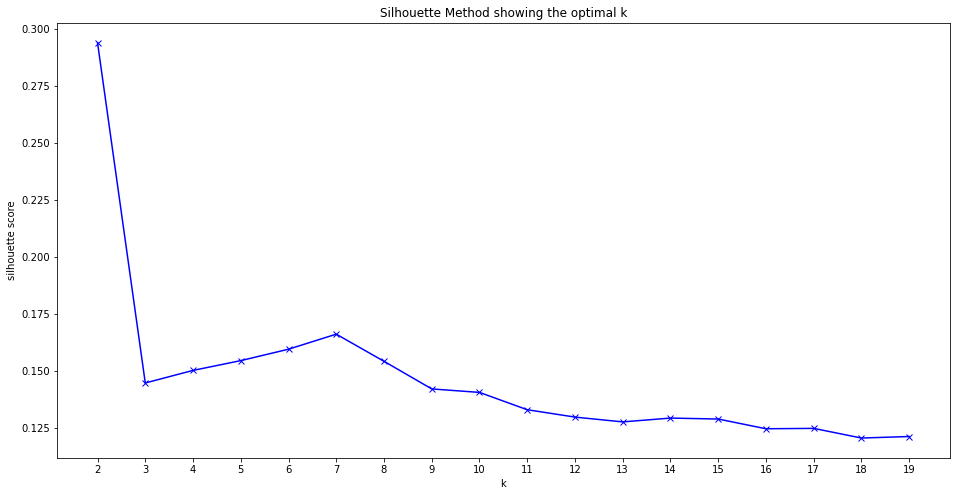

In [15]:
plt.figure(figsize=(16,8))
plt.plot(K2, silhouette2, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K2), max(K2)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [ ]:
#There is a clear pick at 7, I could also go for 10...

In [ ]:
# I will pick 17 that is more or lessa peak... and slitghtly an elbow

## 3. I choose for 10 cluster in k-mean model

In [25]:
#10 clusters
kmeans = KMeans(n_clusters=17, random_state=1234)
kmeans.fit(scaled_df)

KMeans(n_clusters=17, random_state=1234)

In [26]:
clusters = kmeans.predict(scaled_df)
clusters

array([14,  5,  6, ...,  1,  6,  6], dtype=int32)

In [47]:
np.isnan(clusters).sum()

0

In [55]:
pd.Series(clusters).value_counts().sort_index()

0      431
1      507
2      713
3      312
4      576
5      329
6      958
7      320
8      858
9      429
10     333
11     736
12     590
13     671
14    1011
15     882
16     461
dtype: int64

In [49]:
#ADD THE LABELS TO MY ORIGINAL TABLE

audio_features_for_cluster["cluster"] = clusters #I create the new colum cluster
audio_features_for_cluster.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.759,0.459,8.0,-5.187,1.0,0.0948,0.00323,0.0,0.0906,0.695,109.997,14
1,0.556,0.661,6.0,-5.052,0.0,0.2040,0.30000,0.0,0.1010,0.668,168.560,5
2,0.702,0.825,6.0,-3.787,0.0,0.0601,0.00883,0.0,0.0674,0.915,102.977,6
3,0.677,0.696,0.0,-6.181,1.0,0.1190,0.32100,0.0,0.4200,0.464,90.030,11
4,0.586,0.616,5.0,-7.964,1.0,0.0324,0.18200,0.0,0.0927,0.719,148.088,12


In [58]:
###export the file

audio_features_for_cluster.to_csv("../data/audio_features_for_cluster_labeled.csv")

## 4. Export model

In [31]:
import pickle

#scaler = StandardScaler()
#model = KMeans()

#this is the scaler that i am saving

with open("../data/scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)


In [32]:
#same for k-means

with open("../data/kmeans.pickle", "wb") as f:
    pickle.dump(kmeans,f)